In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2

## SSD Detection

In [12]:
def ssd_detection(image_path, class_names, net, confidence):
    # read the image and grab its spatial dimensions
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    image_copy = np.copy(image)
        
    np.random.seed(123)
    colors = np.random.randint(0, 255, size=(len(class_names), 3), 
                               dtype="uint8").astype("float")
    
    # construct a blob from the input image and then 
    tensor = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), 
                                   swapRB=True, crop=False)
    
    # perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    net.setInput(tensor)
    start = time.time()
    detections = net.forward()
    end = time.time()
    
    # show timing information on YOLO
    print("Forward Time: SSD took {:.6f} seconds.".format(end - start))

    for i in np.arange(detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence_ = detections[0, 0, i, 2]
 
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence_ > confidence:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # display the prediction
            label = "{}: {:.2f}%".format(class_names[idx], confidence_ * 100)
            cv2.rectangle(image_copy, (startX, startY), (endX, endY), 
                          colors[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image_copy, label, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)
            
    plt.figure(figsize=(15, 12))
    plt.imshow(image_copy[:, :, [2, 1, 0]])
    plt.axis('off')
    plt.grid(False)
    plt.show()      

In [13]:
model_path = "./model/MobileNetSSD_deploy.caffemodel"
proto_path = "./model/deploy.prototxt"

In [14]:
CONFIDENCE = 0.5

In [15]:
class_names = ["background", "aeroplane", "bicycle", "bird", "boat", 
               "bottle", "bus", "car", "cat", "chair", "cow", 
               "diningtable", "dog", "horse", "motorbike", "person", 
               "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

In [16]:
ssd = cv2.dnn.readNetFromCaffe(proto_path, model_path)

Forward Time: SSD took 0.819046 seconds.


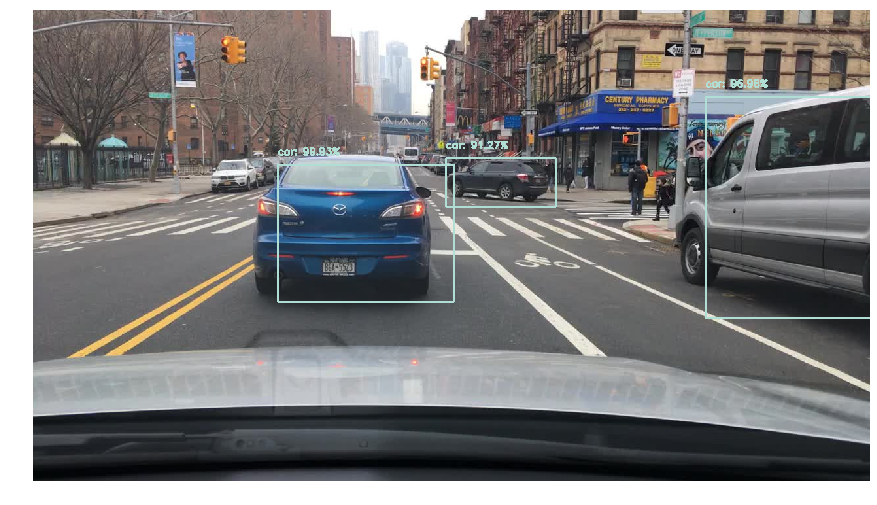

In [17]:
image_path = "../../../datasets/road_scene.jpg"

ssd_detection(image_path, class_names, ssd, confidence=CONFIDENCE)

Forward Time: SSD took 0.583033 seconds.


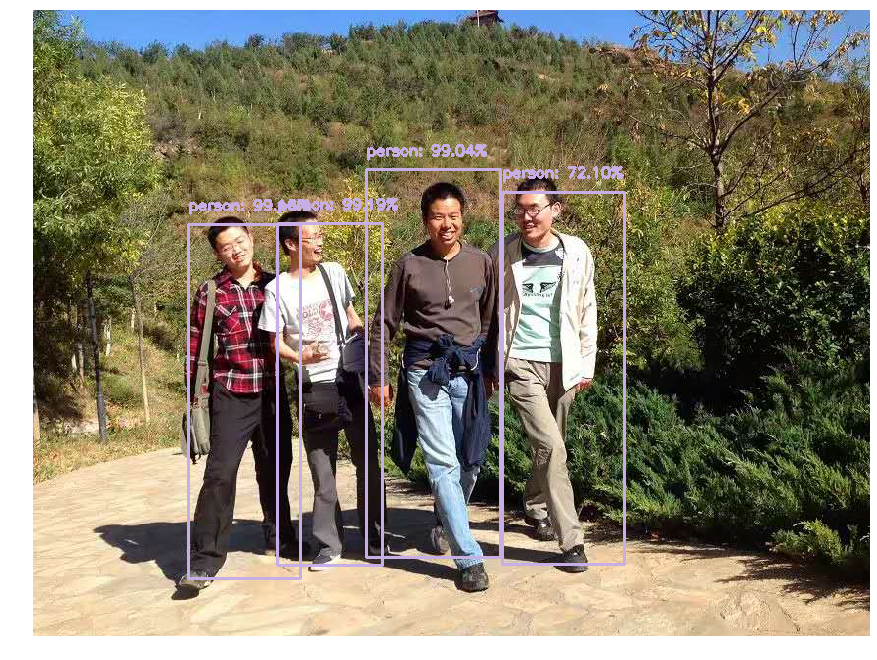

In [18]:
image_path = "../../../datasets/friends.jpg"

ssd_detection(image_path, class_names, ssd, confidence=CONFIDENCE)